#### This will install the required packages: opencv-python

In [1]:
#pip install opencv-python

#### Importing libraries and modules

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#### Input images path

In [3]:
#### Chnage the path in input_dir based on your local machine

In [4]:
input_dir = r'D:\Sem 2\Machine Learning\Project\train'
categories = ['Bacterial_leaf_blight', 'Brown_spot', 'healthy','Leaf_blast','leaf_scald','narrow_brown_spot']

#### Labels for data

In [5]:
data = []
labels = []

#### Read each image and lables

In [6]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        data.append(img)
        labels.append(category_idx)

#### Display one of the read images

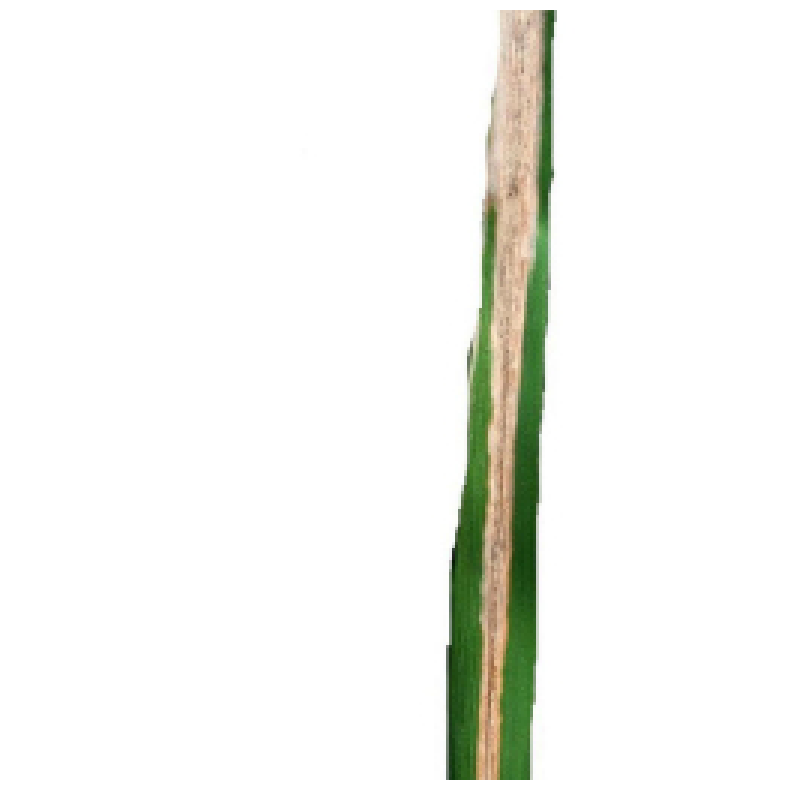

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data[108])
ax.axis('off')
plt.show()

#### Displaying the distribution of pixels of a image

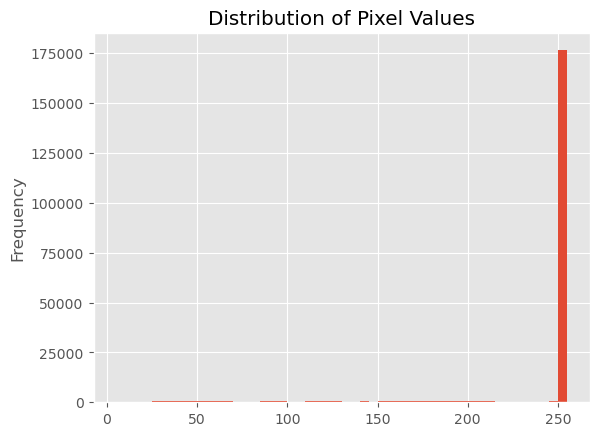

In [8]:
pd.Series(data[108].flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

#### Display RGB Channels of our image

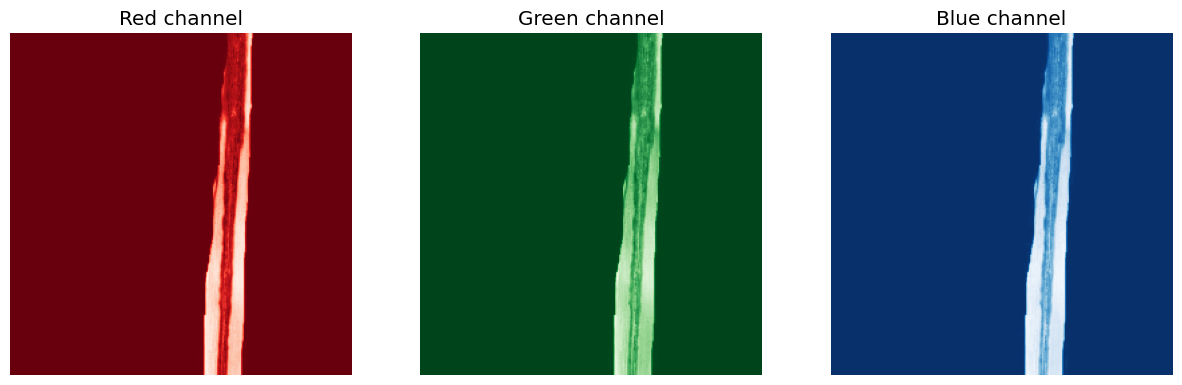

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(data[108][:,:,0], cmap='Reds')
axs[1].imshow(data[108][:,:,1], cmap='Greens')
axs[2].imshow(data[108][:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

#### Maximum and Minimum size of all the images read

In [10]:
min_size = [float('inf')] * 3
max_size = [0] * 3

for img in data:
    size = img.shape
    for i in range(3):
        if size[i] < min_size[i]:
            min_size[i] = size[i]
        if size[i] > max_size[i]:
            max_size[i] = size[i]

print("Minimum size:", min_size)
print("Maximum size:", max_size)


Minimum size: [256, 256, 3]
Maximum size: [256, 256, 3]


#### Resizing the data by cropping the edges

In [11]:
resized_data = []
for img in data:
    resized_img = resize(img, (220, 220))
    resized_data.append(resized_img)

#### Maximum and Minimum size of cropped images

In [12]:
min_size = [float('inf')] * 3
max_size = [0] * 3

for img in resized_data:
    size = img.shape
    for i in range(3):
        if size[i] < min_size[i]:
            min_size[i] = size[i]
        if size[i] > max_size[i]:
            max_size[i] = size[i]

print("Minimum size:", min_size)
print("Maximum size:", max_size)


Minimum size: [220, 220, 3]
Maximum size: [220, 220, 3]


#### Dispplaying the cropped image

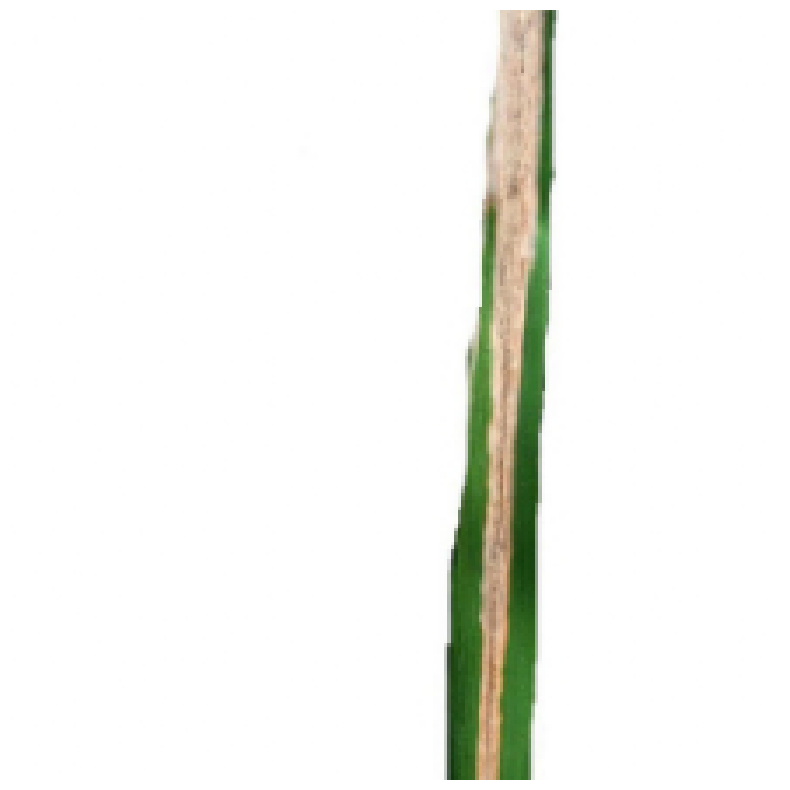

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(resized_data[108])
ax.axis('off')
plt.show()

#### Displaying the distribution of pixels of the cropped image

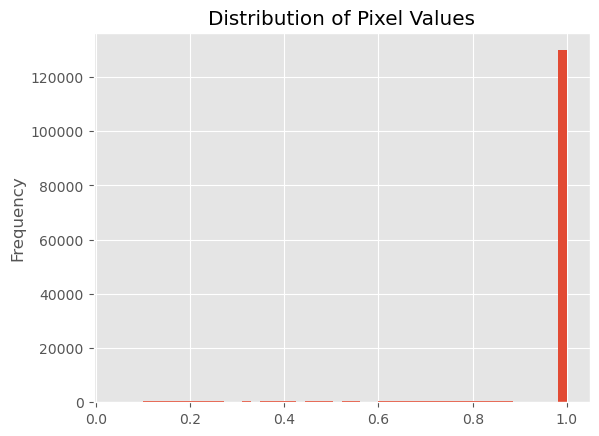

In [14]:
#Displaying the distribution of pixels of a image

pd.Series(resized_data[108].flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

#### Display RGB Channels of the cropped image

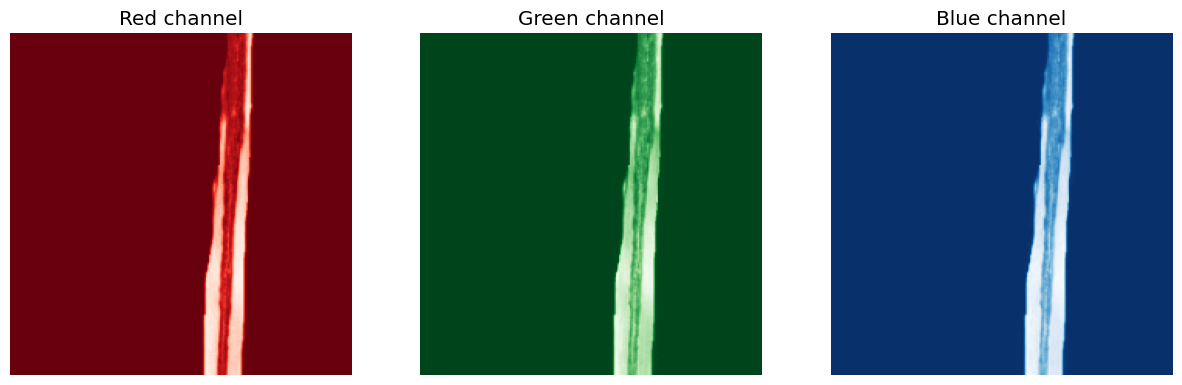

In [15]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(resized_data[108][:,:,0], cmap='Reds')
axs[1].imshow(resized_data[108][:,:,1], cmap='Greens')
axs[2].imshow(resized_data[108][:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

#### Flatten the data

In [16]:
flat_data = []
for img in resized_data:
    flat_data.append(img.flatten())

In [17]:
data = np.array(flat_data, dtype=object)
labels = np.array(labels)

#### Shape of final data frame

In [18]:
data.shape

(2100, 145200)

#### Splitting train, test

In [19]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

#### Create and fit Logistic Regression classifier

In [20]:
# Create and fit Logistic regression classifier
lr = LogisticRegression()
lr.fit(x_train, y_train)

# predict using Logistic Regression classifier
lr_pred = lr.predict(x_test)

C:\Users\ruvva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Calculate metrics for Logistic Regression classifier

In [21]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1_score = f1_score(y_test, lr_pred, average='weighted')


#### Create and fit Random Forest classifier

In [22]:
# Create and fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# predict using Random Forest classifier
rf_pred = rf.predict(x_test)


#### Calculate metrics for Random Forest classifier

In [23]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1_score = f1_score(y_test, rf_pred, average='weighted')

#### Create and fit SVC

In [24]:
# create and fit SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

# predict using SVC
svc_pred = svc.predict(x_test)


#### Calculate metrics for SVC classifier

In [25]:

svc_accuracy = accuracy_score(y_test, svc_pred)
svc_confusion_matrix = confusion_matrix(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred, average='weighted')
svc_recall = recall_score(y_test, svc_pred, average='weighted')
svc_f1_score = f1_score(y_test, svc_pred, average='weighted')

#### Confusion matrix of all the models

In [26]:
print("Logistic Regression Confusion Matrix:\n", lr_confusion_matrix)
print("\nRandom Forest Confusion Matrix:\n", rf_confusion_matrix)
print("\nSVC Confusion Matrix:\n", svc_confusion_matrix)

Logistic Regression Confusion Matrix:
 [[64  0  0  4  2  0]
 [ 6 37  5  8  1 13]
 [ 0  3 49 13  3  2]
 [ 2 10 13 39  3  3]
 [ 0  1  1  1 66  1]
 [ 1  4  0  6  3 56]]

Random Forest Confusion Matrix:
 [[66  0  0  0  2  2]
 [ 0 50  1 10  0  9]
 [ 0  2 63  5  0  0]
 [ 0  4 11 47  5  3]
 [ 0  0  0  0 66  4]
 [ 0  1  0  1  0 68]]

SVC Confusion Matrix:
 [[66  0  0  2  1  1]
 [ 2 56  1  7  0  4]
 [ 1  2 54 13  0  0]
 [ 1  8 12 45  1  3]
 [ 0  2  0  1 67  0]
 [ 1  3  0  4  3 59]]


#### Accuracy of all the models

In [27]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nSVC Accuracy:", svc_accuracy)

Logistic Regression Accuracy: 0.7404761904761905

Random Forest Accuracy: 0.8571428571428571

SVC Accuracy: 0.8261904761904761


#### Precision of all the models

In [28]:
print("Logistic Regression Precision:", lr_precision)
print("\nRandom Forest Precision:", rf_precision)
print("\nSVC Precision:", svc_precision)

Logistic Regression Precision: 0.7353573540428189

Random Forest Precision: 0.8596719986579312

SVC Precision: 0.826738763148265


#### Recall of all the models

In [29]:
print("Logistic Regression Recall:", lr_recall)
print("\nRandom Forest Recall:", rf_recall)
print("\nSVC Recall:", svc_recall)

Logistic Regression Recall: 0.7404761904761905

Random Forest Recall: 0.8571428571428571

SVC Recall: 0.8261904761904761


#### F1 score of all the models

In [30]:
print("Logistic Regression F1 Score:", lr_f1_score)
print("\nRandom Forest F1 Score:", rf_f1_score)
print("\nSVC F1 Score:", svc_f1_score)

Logistic Regression F1 Score: 0.7357911661663618

Random Forest F1 Score: 0.8547656732506123

SVC F1 Score: 0.8262660465215756
